In [1]:
using Revise
includet("utils/file_reader.jl")
includet("utils/some_data.jl")
includet("utils/utils_graph.jl")
includet("resolution/compact/compact_formulation.jl")
includet("utils/visu.jl")

using JuMP, CPLEX

In [11]:
instance = get_instance_from_folder("instances/Ans")
for edge in edges(instance.s_network)
    instance.s_network[src(edge), dst(edge)][:cap] = 100
end

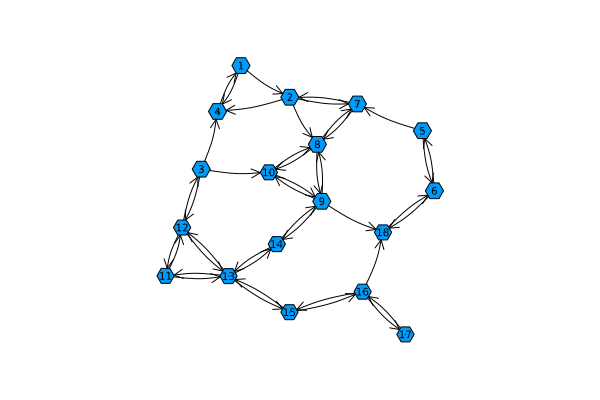

In [40]:
visu_graph(instance.s_network)
#visu_graph(instance.v_networks[1])


In [15]:
#print_substrate(instance.s_network)
print_virtual(instance.v_networks[1])

Metagraph 
Node 1 with dem 1
Node 2 with dem 1
Node 3 with dem 1
Node 4 with dem 1
Node 5 with dem 1
Node 6 with dem 1
Node 7 with dem 1
Edge Edge 1 => 2 with dem 1
Edge Edge 1 => 3 with dem 1
Edge Edge 1 => 4 with dem 1
Edge Edge 2 => 3 with dem 1
Edge Edge 3 => 4 with dem 1
Edge Edge 3 => 7 with dem 1
Edge Edge 4 => 2 with dem 1
Edge Edge 4 => 5 with dem 1
Edge Edge 5 => 2 with dem 1
Edge Edge 5 => 4 with dem 1
Edge Edge 5 => 7 with dem 1
Edge Edge 6 => 2 with dem 1
Edge Edge 6 => 3 with dem 1
Edge Edge 6 => 7 with dem 1
Edge Edge 7 => 2 with dem 1
Edge Edge 7 => 5 with dem 1


In [25]:
linear = []
integer_node = []
integer = []

for i_cap in 1:7
    #changing capacities
    for node in vertices(instance.s_network)
        instance.s_network[node][:cap] = i_cap
    end

    solution_frac = solve_compact_fractional(instance);
    cost_frac = 0
    for mapping in solution_frac
        cost_frac += mapping.node_placement_cost
        cost_frac += mapping.edge_routing_cost
    end
    push!(linear, cost_frac)

    solution_int = solve_compact_integer(instance)
    cost_int = 0
    cost_placement_int = 0
    for mapping in solution_int
        cost_int += mapping.node_placement_cost
        cost_int += mapping.edge_routing_cost
        cost_placement_int += mapping.node_placement_cost
    end
    push!(integer, cost_int)
    push!(integer_node, cost_placement_int)
end


Constructing compact model...CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Tried aggregator 1 time.
LP Presolve eliminated 42 rows and 0 columns.
Reduced LP has 313 rows, 798 columns, and 2172 nonzeros.
Presolve time = 0.00 sec. (0.83 ticks)
Symmetry aggregator did 458 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =             5.000000

Dual crossover.
  Dual:  Fixing 2 variables.
        1 DMoves:  Infeasibility  5.82867088e-15  Objective  8.00000000e+00
        0 DMoves:  Infeasibility  2.67008637e-14  Objective  8.00000000e+00
  Dual:  Pushed 0, exchanged 2.
  Primal:  Fixed no variables.
Constructing compact model...

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Tried aggregator 1 time.
MIP Presolve eliminated 42 rows and 0 columns.
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (1.19 ticks)
Found incumbent of value 165.000000 after 0.02 sec. (6.55 ticks)
Probing time = 0.00 sec. (0.60 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.58 ticks)
Probing time = 0.00 sec. (0.59 ticks)
Clique table members: 185.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (1.28 ticks)

        Nodes             

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Tried aggregator 1 time.
MIP Presolve eliminated 42 rows and 0 columns.
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.12 ticks)
Found incumbent of value 176.000000 after 0.04 sec. (6.71 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (1.51 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Clique table members: 7.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.01 sec. (0.96 ticks)

        Nodes               

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Tried aggregator 1 time.
MIP Presolve eliminated 42 rows and 0 columns.
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (1.12 ticks)
Found incumbent of value 164.000000 after 0.02 sec. (6.13 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.51 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Clique table members: 7.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.76 ticks)

        Nodes               

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Tried aggregator 1 time.
MIP Presolve eliminated 42 rows and 0 columns.
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.12 ticks)
Found incumbent of value 164.000000 after 0.02 sec. (6.13 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.51 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Clique table members: 7.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.76 ticks)

        Nodes               

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Found incumbent of value 15.000000 after 0.00 sec. (0.11 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 42 rows and 0 columns.
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (1.12 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.51 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Clique table members: 7.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.58 ticks)

        Nodes                

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Found incumbent of value 11.000000 after 0.00 sec. (0.08 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 42 rows and 0 columns.
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.12 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 313 rows, 798 columns, and 2172 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.51 ticks)
Probing time = 0.00 sec. (0.50 ticks)
Clique table members: 7.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.59 ticks)

        Nodes                

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Found incumbent of value 11.000000 after 0.00 sec. (0.08 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 60 rows and 0 columns.
Reduced MIP has 295 rows, 798 columns, and 2046 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.09 ticks)
Probing time = 0.00 sec. (0.45 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 295 rows, 798 columns, and 2046 nonzeros.
Reduced MIP has 798 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.45 ticks)
Probing time = 0.00 sec. (0.45 ticks)
Clique table members: 7.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.41 ticks)

        Nodes                

In [26]:
linear
integer_node
integer


7-element Vector{Any}:
 38
 25
 18
 14
 13
 10
  7

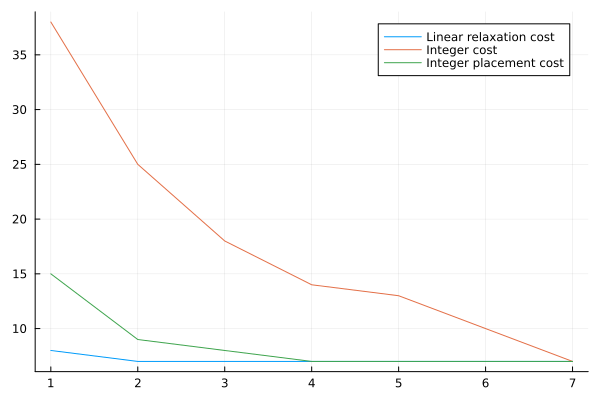

In [37]:
plot(linear, label = "Linear relaxation cost")
plot!(integer, label = "Integer cost")
plot!(integer_node, label = "Integer placement cost")